In [72]:
import pandas as pd
df = pd.read_csv('Healtcare-Dataset.csv')
data = {
    'Patient_ID': [1, 2, 3, 4],
    'Admit_Date': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01'],
    'Discharge_Date': ['2023-01-05', '2023-02-10', '2023-03-20', '2023-04-10'],
    'Diagnosis': ['Flu', 'Covid-19', 'Flu', 'Covid-19'],
    'Bed_Occupancy': [1, 1, 1, 1],
    'Test': ['Blood', 'X-Ray', 'MRI', 'CT-Scan'],
    'Doctor': ['Dr. Smith', 'Dr. Jones', 'Dr. Smith', 'Dr. Lee'],
    'Followup_Date': ['2023-01-10', '2023-02-20', '2023-03-30', '2023-04-20'],
    'Feedback': [8, 9, 7, 8],
    'Billing Amount': [500, 1500, 2000, 2500],
    'Health Insurance Amount': [300, 1200, 0, 2000]
}
df = pd.DataFrame(data)

# Convert date columns to datetime format
df['Admit_Date'] = pd.to_datetime(df['Admit_Date'])
df['Discharge_Date'] = pd.to_datetime(df['Discharge_Date'])
df['Followup_Date'] = pd.to_datetime(df['Followup_Date'])

# 1. Average length of stay for patients
df['Length_of_Stay'] = (df['Discharge_Date'] - df['Admit_Date']).dt.days
average_length_of_stay = df['Length_of_Stay'].mean()
print(f"Average Length of Stay: {average_length_of_stay:.2f} days")

# 2. Doctor with the highest number of patients
doctor_patient_counts = df['Doctor'].value_counts()
most_patients_doctor = doctor_patient_counts.idxmax()
print(f"Doctor with the most patients: {most_patients_doctor} with {doctor_patient_counts.max()} patients")

# 3. Most common diagnoses among patients
diagnosis_counts = df['Diagnosis'].value_counts()
most_common_diagnosis = diagnosis_counts.idxmax()
print(f"Most common diagnosis: {most_common_diagnosis} with {diagnosis_counts.max()} occurrences")

# 4. Average billing amount for patients with and without health insurance
insured_patients = df[df['Health Insurance Amount'] > 0]
uninsured_patients = df[df['Health Insurance Amount'] == 0]
average_billing_insured = insured_patients['Billing Amount'].mean()
average_billing_uninsured = uninsured_patients['Billing Amount'].mean()
print(f"Average Billing Amount for Insured Patients: ${average_billing_insured:.2f}")
print(f"Average Billing Amount for Uninsured Patients: ${average_billing_uninsured:.2f}")

# 5. Correlation between feedback score and length of stay
correlation = df['Feedback'].corr(df['Length_of_Stay'])
print(f"Correlation between Feedback and Length of Stay: {correlation:.2f}")


Average Length of Stay: 10.25 days
Doctor with the most patients: Dr. Smith with 2 patients
Most common diagnosis: Flu with 2 occurrences
Average Billing Amount for Insured Patients: $1500.00
Average Billing Amount for Uninsured Patients: $2000.00
Correlation between Feedback and Length of Stay: -0.65


In [74]:
#USING matplotlib & plotly Both for Visualization and Interactive Visualization 

<Figure size 1000x600 with 0 Axes>

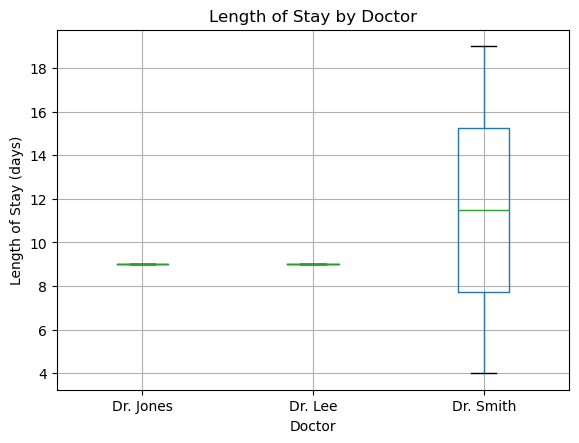

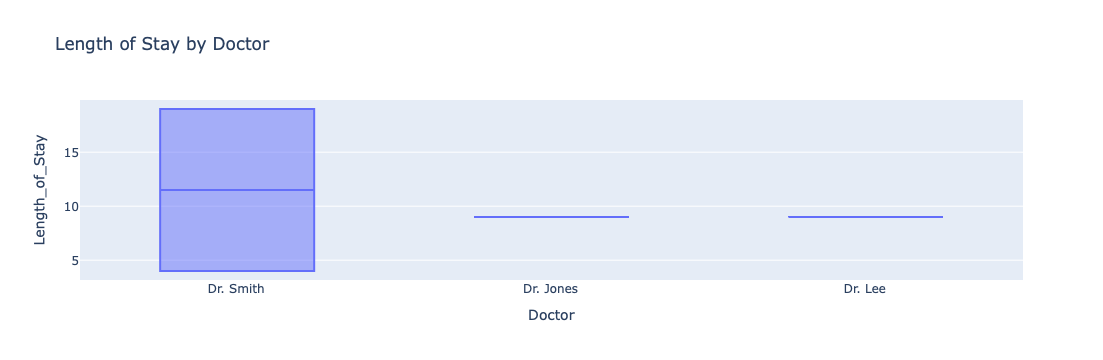

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 

data = {
    'Patient_ID': [1, 2, 3, 4],
    'Admit_Date': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01'],
    'Discharge_Date': ['2023-01-05', '2023-02-10', '2023-03-20', '2023-04-10'],
    'Diagnosis': ['Flu', 'Covid-19', 'Flu', 'Covid-19'],
    'Bed_Occupancy': [1, 1, 1, 1],
    'Test': ['Blood', 'X-Ray', 'MRI', 'CT-Scan'],
    'Doctor': ['Dr. Smith', 'Dr. Jones', 'Dr. Smith', 'Dr. Lee'],
    'Followup_Date': ['2023-01-10', '2023-02-20', '2023-03-30', '2023-04-20'],
    'Feedback': [8, 9, 7, 8],
    'Billing Amount': [500, 1500, 2000, 2500],
    'Health Insurance Amount': [300, 1200, 0, 2000]
}
df = pd.DataFrame(data)

# Ensure date columns are in datetime format
df['Admit_Date'] = pd.to_datetime(df['Admit_Date'])
df['Discharge_Date'] = pd.to_datetime(df['Discharge_Date'])
df['Followup_Date'] = pd.to_datetime(df['Followup_Date'])

# Calculate Length of Stay
df['Length_of_Stay'] = (df['Discharge_Date'] - df['Admit_Date']).dt.days

# 1. Average length of stay for patients(Box Plot)
plt.figure(figsize=(10, 6))
df.boxplot(column='Length_of_Stay', by='Doctor')
plt.title('Length of Stay by Doctor')
plt.suptitle('')
plt.xlabel('Doctor')
plt.ylabel('Length of Stay (days)')
plt.show()

# Plotly Box Plot
fig1 = px.box(df, x='Doctor', y='Length_of_Stay', title='Length of Stay by Doctor')
fig1.show()


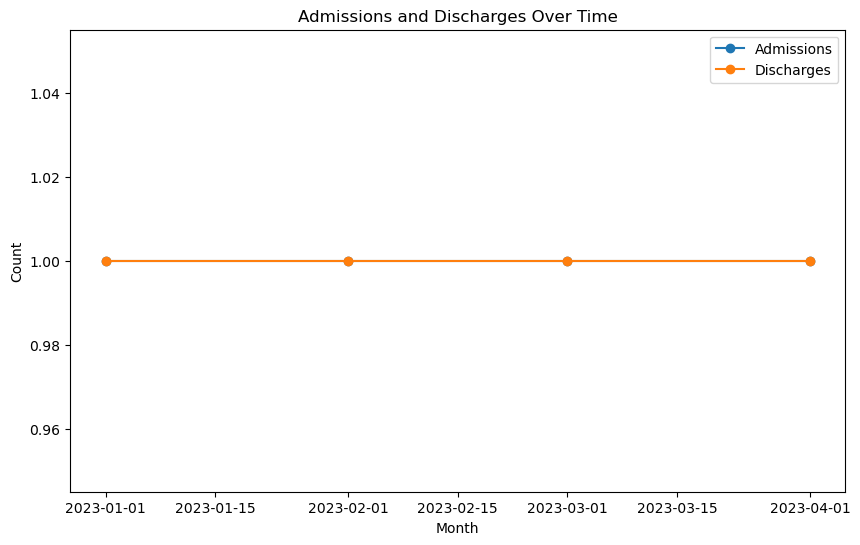

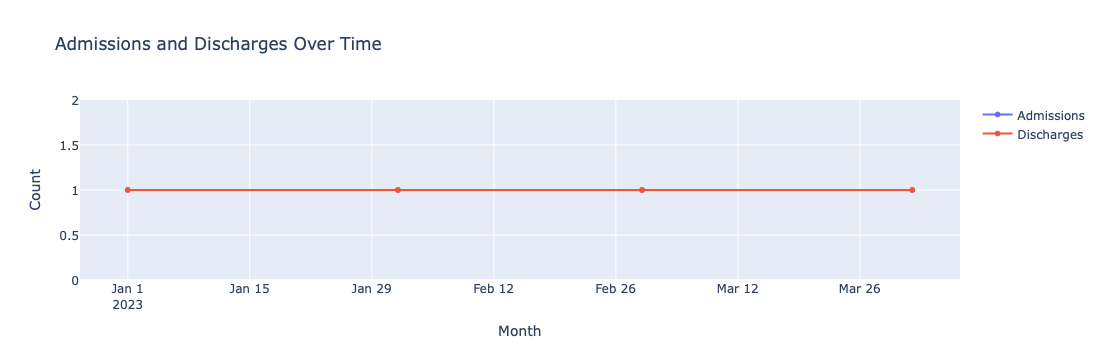

In [78]:
# 2. Doctor with the highest number of patients in Matplotlib line chart
df['Admit_Month'] = df['Admit_Date'].dt.to_period('M').dt.to_timestamp()
df['Discharge_Month'] = df['Discharge_Date'].dt.to_period('M').dt.to_timestamp()

admissions = df['Admit_Month'].value_counts().sort_index()
discharges = df['Discharge_Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(admissions.index, admissions.values, marker='o', label='Admissions')
plt.plot(discharges.index, discharges.values, marker='o', label='Discharges')
plt.title('Admissions and Discharges Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plotly line chart
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=admissions.index, y=admissions.values, mode='lines+markers', name='Admissions'))
fig2.add_trace(go.Scatter(x=discharges.index, y=discharges.values, mode='lines+markers', name='Discharges'))
fig2.update_layout(title='Admissions and Discharges Over Time', xaxis_title='Month', yaxis_title='Count')
fig2.show()


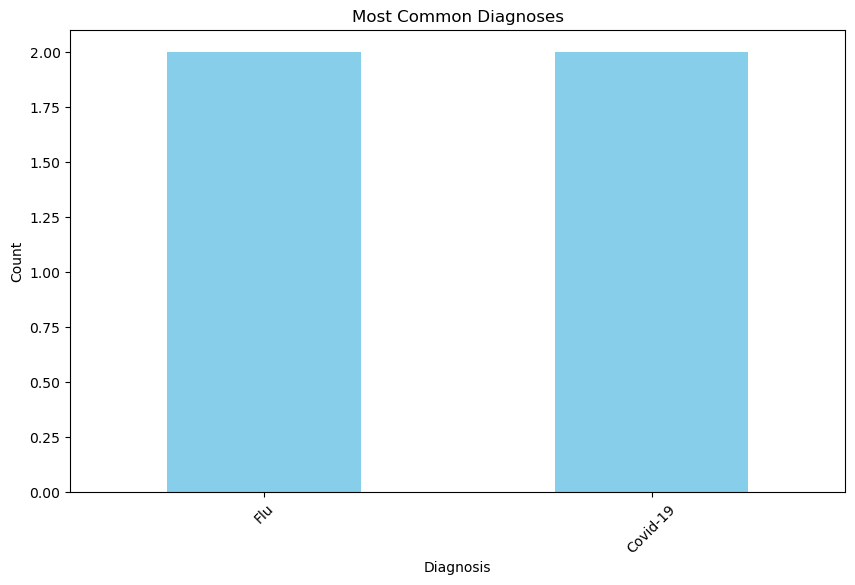

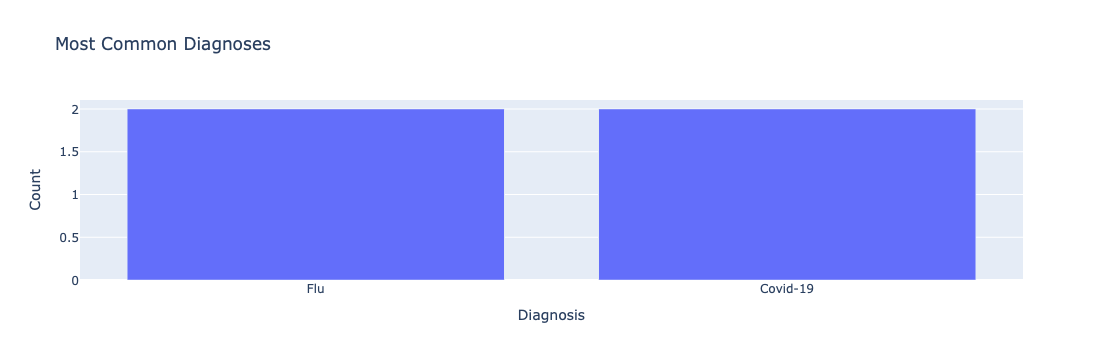

In [80]:
# 3. Most common diagnoses among patients in Matplotlib 
diagnosis_counts = df['Diagnosis'].value_counts()
plt.figure(figsize=(10, 6))
diagnosis_counts.plot(kind='bar', color='skyblue')
plt.title('Most Common Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot using Plotly
diagnosis_counts = df['Diagnosis'].value_counts().reset_index()
diagnosis_counts.columns = ['Diagnosis', 'Count']

fig = px.bar(diagnosis_counts, x='Diagnosis', y='Count', title='Most Common Diagnoses')
fig.update_layout(xaxis_title='Diagnosis', yaxis_title='Count')
fig.show()


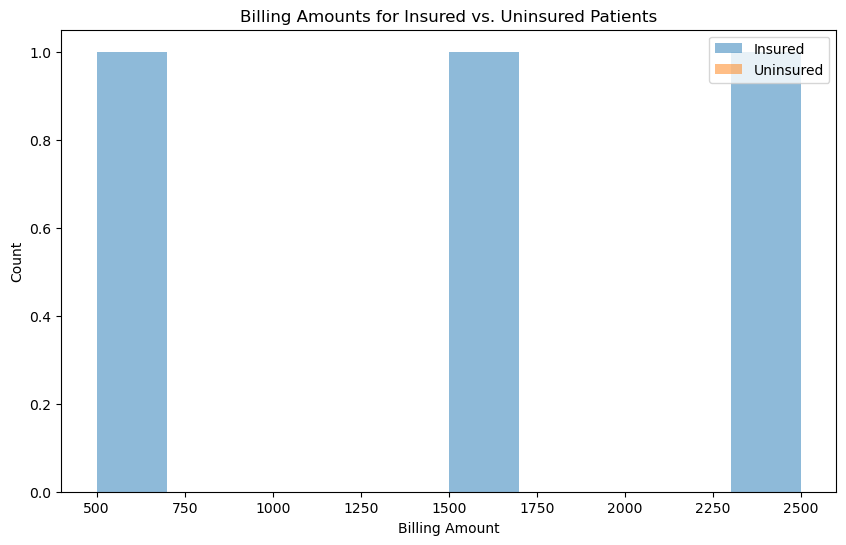

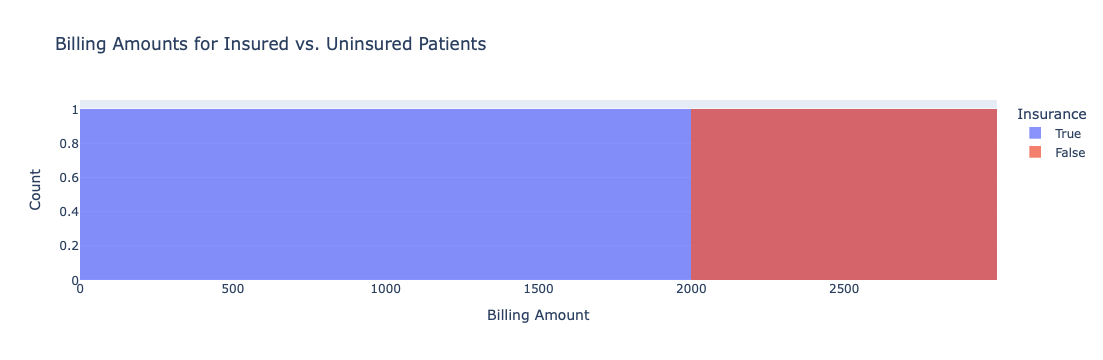

In [82]:
# 4. Average billing amount for patients with and without health insurance in Matplotlib histogram
insured_patients = df[df['Health Insurance Amount'] > 0]
uninsured_patients = df[df['Health Insurance Amount'] == 0]

plt.figure(figsize=(10, 6))
plt.hist(insured_patients['Billing Amount'], alpha=0.5, label='Insured', bins=10)
plt.hist(uninsured_patients['Billing Amount'], alpha=0.5, label='Uninsured', bins=10)
plt.title('Billing Amounts for Insured vs. Uninsured Patients')
plt.xlabel('Billing Amount')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

# Plotly histogram
fig4 = px.histogram(df, x='Billing Amount', color=df['Health Insurance Amount'] > 0, title='Billing Amounts for Insured vs. Uninsured Patients')
fig4.update_layout(barmode='overlay')
fig4.update_traces(opacity=0.75)
fig4.update_layout(xaxis_title='Billing Amount', yaxis_title='Count', legend_title='Insurance')
fig4.show()


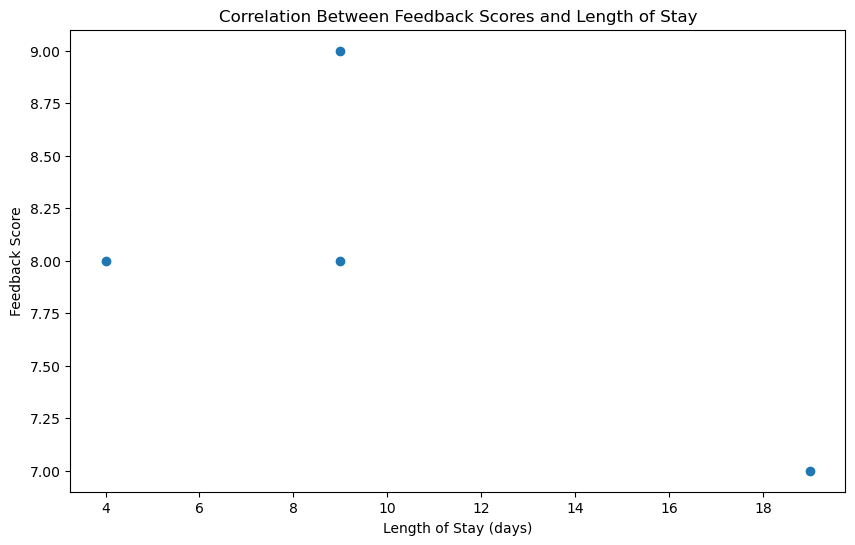

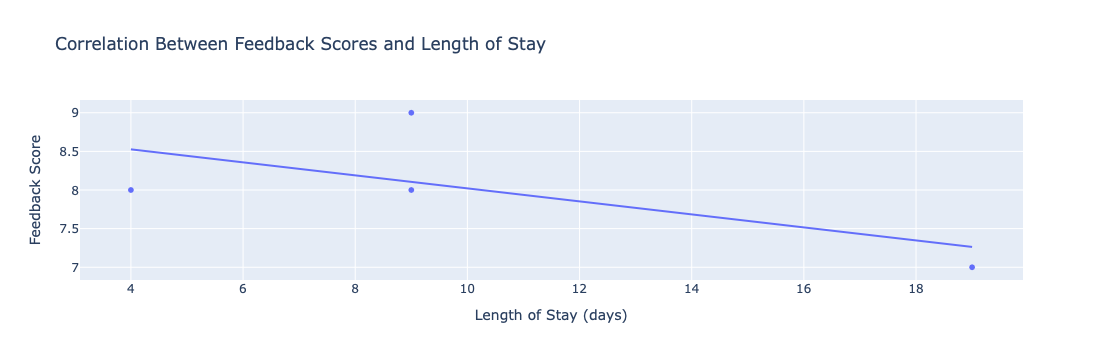

In [84]:
# 5. Correlation between feedback score and length of stay in Matplotlib scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Length_of_Stay'], df['Feedback'])
plt.title('Correlation Between Feedback Scores and Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Feedback Score')
plt.show()

# Plotly scatter plot
fig5 = px.scatter(df, x='Length_of_Stay', y='Feedback', trendline='ols', title='Correlation Between Feedback Scores and Length of Stay')
fig5.update_layout(xaxis_title='Length of Stay (days)', yaxis_title='Feedback Score')
fig5.show()
